In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
### there is no need to preprocess.

In [4]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor()
lof.fit_predict(df)
scores=lof.negative_outlier_factor_
scores.mean(),scores.max(),scores.min()

(-1.1003313761856826, -0.9525025524264, -5.053201478494648)

In [5]:
vector = scores >= -1.3

In [6]:
df=df[vector]

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [8]:
x=df.drop("target",axis=1)
y=df.target

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

models=[LogisticRegression,
       KNeighborsClassifier,
       SVC,
       MLPClassifier,
       DecisionTreeClassifier,
       RandomForestClassifier,
       GradientBoostingClassifier,
       LGBMClassifier,
       XGBClassifier,
       CatBoostClassifier]

import time

def fitter(x_train,x_test,y_train,y_test,model):
        startt=time.time()
        if model==CatBoostClassifier:
            modelf=model().fit(x_train,y_train,verbose=False)
        else:
            modelf=model().fit(x_train,y_train)
        y_pred=modelf.predict(x_test)
        timer=time.time()-startt
        ascore=cross_val_score(model(),x_train,y_train ,cv=10, scoring="accuracy", n_jobs=-1).mean()
        f1score=cross_val_score(model(),x_train,y_train ,cv=10, scoring="f1", n_jobs=-1).mean()
        print("""
            Model:{}
            accuracy_score:{}
            f1_score:{}
            fit&predict time:{}
            """.format(model.__name__,ascore,f1score,timer))
        print("-"*60)


for i in models:
    fitter(x_train,x_test,y_train,y_test,i)

C:\Users\berka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



            Model:LogisticRegression
            accuracy_score:0.8486166007905138
            f1_score:0.8697100893997446
            fit&predict time:0.028923511505126953
            
------------------------------------------------------------

            Model:KNeighborsClassifier
            accuracy_score:0.6616600790513834
            f1_score:0.7107153962701189
            fit&predict time:0.009974002838134766
            
------------------------------------------------------------

            Model:SVC
            accuracy_score:0.6796442687747035
            f1_score:0.7509171507436246
            fit&predict time:0.015954256057739258
            
------------------------------------------------------------

            Model:MLPClassifier
            accuracy_score:0.6567193675889328
            f1_score:0.7216411452035576
            fit&predict time:0.3001995086669922
            
------------------------------------------------------------

            Model:DecisionT

C:\Users\berka\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



            Model:XGBClassifier
            accuracy_score:0.8045454545454547
            f1_score:0.828039072039072
            fit&predict time:0.1186823844909668
            
------------------------------------------------------------

            Model:CatBoostClassifier
            accuracy_score:0.8357707509881422
            f1_score:0.8573146113146114
            fit&predict time:1.8952362537384033
            
------------------------------------------------------------


In [10]:
from sklearn.preprocessing import StandardScaler
steps=[("scaler",StandardScaler()),("svc",SVC())]
pipeline=Pipeline(steps)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [11]:
svc_params = {'svc__C':[0.001,0.1,10,100,10e5],
               'svc__gamma':[0.1,0.01]}

svc_cv_model=GridSearchCV(pipeline,svc_params,cv=5,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [12]:
svc_cv_model.best_params_

{'svc__C': 10, 'svc__gamma': 0.01}

In [13]:
svc_tuned=SVC(C=10,gamma=0.01).fit(x_train,y_train)
y_pred=svc_tuned.predict(x_test)

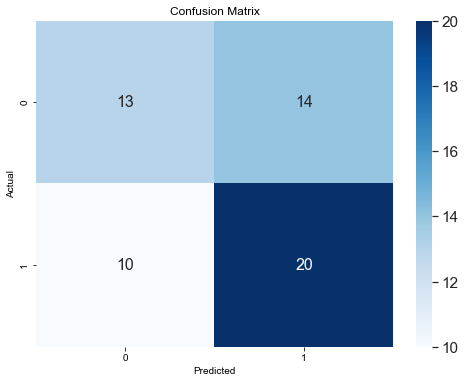

SCORES
accuracy_score:0.5789473684210527
f1_score:0.625

              precision    recall  f1-score   support

           0       0.57      0.48      0.52        27
           1       0.59      0.67      0.62        30

    accuracy                           0.58        57
   macro avg       0.58      0.57      0.57        57
weighted avg       0.58      0.58      0.58        57



In [14]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return
plot_confusion_matrix(y_test,y_pred)

ascore=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

print("SCORES")
print("""accuracy_score:{}
f1_score:{}
""".format(ascore,f1score))

print(classification_report(y_test,y_pred))

In [15]:
from sklearn import preprocessing as pp
xtr_backup=x_train
xte_backup=x_test

sed=pp.scale(xtr_backup)
sed_xtr=pd.DataFrame(sed,columns=x_train.columns,index=x_train.index)
sed=pp.scale(xte_backup)
sed_xte=pd.DataFrame(sed,columns=x_test.columns,index=x_test.index)


x_train=sed_xtr
x_test=sed_xte

In [16]:
svc_tuned=SVC(C=10,gamma=0.01).fit(x_train,y_train)
y_pred=svc_tuned.predict(x_test)

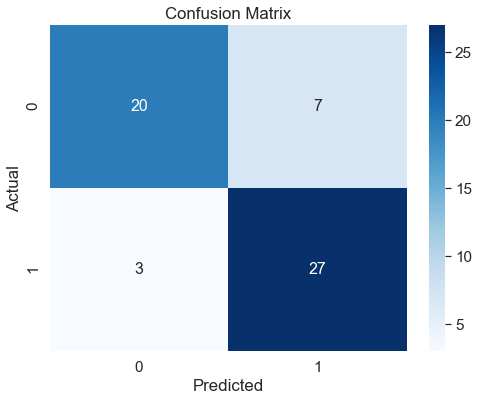

SCORES
accuracy_score:0.8245614035087719
f1_score:0.84375

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.79      0.90      0.84        30

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57



In [17]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return
plot_confusion_matrix(y_test,y_pred)

ascore=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

print("SCORES")
print("""accuracy_score:{}
f1_score:{}
""".format(ascore,f1score))

print(classification_report(y_test,y_pred))

In [18]:
### scaling worked

In [19]:
lgbm_params={
    "learning_rate":[0.01,0.1,0.3],
    "num_leaves":[25,31,40,50],
    "min_child_samples":[10,20,30],
    "max_bin":[255,305,400]
}

lgbm_cv_model=GridSearchCV(LGBMClassifier(),lgbm_params,cv=5,verbose=2,n_jobs=-1).fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [20]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_bin': 255,
 'min_child_samples': 30,
 'num_leaves': 25}

In [21]:
lgbm_tuned=LGBMClassifier(learning_rate=0.01,
                         max_bin=255,
                         min_child_samples=30,
                         n_estimators=5000,
                         num_leaves=25).fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_metric="error")

[1]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 0.688612
[2]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 0.684262
[3]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 0.680245
[4]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 0.676103
[5]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 0.672219
[6]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 0.668221
[7]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 0.664464
[8]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 0.660725
[9]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 0.657087
[10]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 0.653521
[11]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 0.64995
[12]	valid_0's binary_error: 0.315789	valid_0's binary_logloss: 0.646495
[13]	valid_0's binary_error: 0.315789	valid_0's binary_logloss: 0.642913
[14]	valid_0's binary_error: 0.315789	valid_0's binary_loglos

[209]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.372758
[210]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.372309
[211]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.37156
[212]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.371288
[213]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.37064
[214]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.370111
[215]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.369404
[216]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.369233
[217]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.368857
[218]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.368237
[219]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.367984
[220]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.367565
[221]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.366959
[222]	valid_0's binary_error: 0.157895	v

[429]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.326916
[430]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.327087
[431]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.326575
[432]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.326721
[433]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.326719
[434]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.326854
[435]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.326516
[436]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.326797
[437]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.326945
[438]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.327035
[439]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.32717
[440]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.326882
[441]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.326975
[442]	valid_0's binary_error: 0.140351	

[646]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.340674
[647]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.340913
[648]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.340731
[649]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.340938
[650]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.340826
[651]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.341066
[652]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.341136
[653]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.341317
[654]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.341392
[655]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.341503
[656]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.341615
[657]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.341728
[658]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.341616
[659]	valid_0's binary_error: 0.122807

[983]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.344166
[984]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.344231
[985]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.344356
[986]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.344363
[987]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.344372
[988]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.344382
[989]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.344393
[990]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.344405
[991]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.344576
[992]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.344589
[993]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.34433
[994]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.344501
[995]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.344512
[996]	valid_0's binary_error: 0.157895	

[1351]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.358514
[1352]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.358488
[1353]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.358528
[1354]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.358612
[1355]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.358537
[1356]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.358413
[1357]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.358291
[1358]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.358217
[1359]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.358156
[1360]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.357996
[1361]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.357963
[1362]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.358054
[1363]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.35814
[1364]	valid_0's binary_er

[1709]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.36616
[1710]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.366326
[1711]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.366286
[1712]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.366039
[1713]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.366001
[1714]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.365999
[1715]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.366156
[1716]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.365987
[1717]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.366144
[1718]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.366343
[1719]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.366099
[1720]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.366141
[1721]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.366293
[1722]	valid_0's binary_er

[2101]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.377279
[2102]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.377381
[2103]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.377549
[2104]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.377604
[2105]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.377602
[2106]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.377892
[2107]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.377864
[2108]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.378066
[2109]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.37794
[2110]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.378018
[2111]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.378166
[2112]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.378181
[2113]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.378056
[2114]	valid_0's binary_er

[2468]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.391856
[2469]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.391872
[2470]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.392009
[2471]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.392117
[2472]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.392291
[2473]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.392253
[2474]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.392323
[2475]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.392473
[2476]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.392481
[2477]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.392551
[2478]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.392351
[2479]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.392569
[2480]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.392531
[2481]	valid_0's binary_e

[2817]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.41417
[2818]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.414302
[2819]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.414427
[2820]	valid_0's binary_error: 0.122807	valid_0's binary_logloss: 0.414379
[2821]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.414511
[2822]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.414713
[2823]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.414803
[2824]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.414905
[2825]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.415157
[2826]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.414961
[2827]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.415163
[2828]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.415222
[2829]	valid_0's binary_error: 0.140351	valid_0's binary_logloss: 0.415285
[2830]	valid_0's binary_er

[3205]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.439795
[3206]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.439662
[3207]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.439841
[3208]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.439912
[3209]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.440021
[3210]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.440137
[3211]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.440345
[3212]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.440455
[3213]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.440526
[3214]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.440589
[3215]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.44066
[3216]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.440772
[3217]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.440885
[3218]	valid_0's binary_er

[3547]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.452607
[3548]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.452734
[3549]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.453013
[3550]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.452796
[3551]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.453074
[3552]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.452848
[3553]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.453125
[3554]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.453257
[3555]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.453553
[3556]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.453715
[3557]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.453934
[3558]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.453924
[3559]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.453991
[3560]	valid_0's binary_e

[3915]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.47009
[3916]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.47017
[3917]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.470134
[3918]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.470243
[3919]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.470311
[3920]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.470265
[3921]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.470363
[3922]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.470223
[3923]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.47029
[3924]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.470383
[3925]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.470364
[3926]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.470488
[3927]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.470568
[3928]	valid_0's binary_erro

[4272]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.491133
[4273]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.491049
[4274]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.491036
[4275]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.49124
[4276]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.491442
[4277]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.491372
[4278]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.491303
[4279]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.49142
[4280]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.491494
[4281]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.49155
[4282]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.491667
[4283]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.491739
[4284]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.491796
[4285]	valid_0's binary_erro

[4650]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.509892
[4651]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.50998
[4652]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.50992
[4653]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.509775
[4654]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.509843
[4655]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.510014
[4656]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.510084
[4657]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.510239
[4658]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.510328
[4659]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.510451
[4660]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.510555
[4661]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.510542
[4662]	valid_0's binary_error: 0.175439	valid_0's binary_logloss: 0.510657
[4663]	valid_0's binary_err

In [22]:
lgbm_tuned=LGBMClassifier(learning_rate=0.01,
                         max_bin=255,
                         min_child_samples=30,
                         n_estimators=772,
                         num_leaves=25).fit(x_train,y_train)
y_pred=lgbm_tuned.predict(x_test)

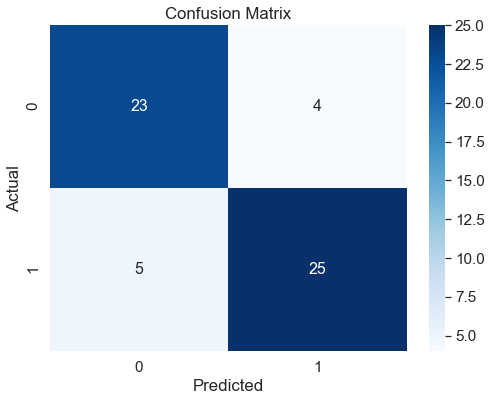

SCORES
accuracy_score:0.8421052631578947
f1_score:0.847457627118644

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.86      0.83      0.85        30

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



In [23]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return
plot_confusion_matrix(y_test,y_pred)

ascore=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

print("SCORES")
print("""accuracy_score:{}
f1_score:{}
""".format(ascore,f1score))

print(classification_report(y_test,y_pred))